In [1]:
#train.py
"""
YOLO NUTS CLASSIFICATION - TRAINING SCRIPT
------------------------------------------
This script trains a YOLOv8 classification model on a nuts dataset.

Dataset Structure:
dataset/
    almond/
    cashew/
    pistachio/
    walnut/
    date/
    raisin/
    fig/
    apricot/

Each folder contains images of that nut class.
"""

import os
from ultralytics import YOLO

# ---------------------------------------------------------
# ✅ 1. DATASET PATH (same as your TensorFlow version)
# ---------------------------------------------------------
dataset_path = r"C:\Users\Srividya\Documents\Nuts"   # root folder of dataset

if not os.path.exists(dataset_path):
    raise Exception("❌ Dataset folder 'dataset/' not found!")

# ---------------------------------------------------------
# ✅ 2. LOAD PRETRAINED YOLO CLASSIFICATION MODEL
# ---------------------------------------------------------
# yolov8n-cls.pt → small, fast
# yolov8m-cls.pt → medium
# yolov8l-cls.pt → high accuracy
model = YOLO("yolov8n-cls.pt")

print("\n✅ Loaded YOLO Classification Model\n")

# ---------------------------------------------------------
# ✅ 3. TRAIN THE MODEL
# ---------------------------------------------------------
# YOLO automatically identifies class folders
model.train(
    data=dataset_path,   # path to dataset root
    epochs=20,           # number of epochs
    imgsz=224,           # image size (same as your old CNN)
    batch=32,            # batch size
    name="nuts_classifier_yolo",  # folder name under runs/
)

print("\n✅ Training Completed Successfully!\n")

# ---------------------------------------------------------
# ✅ 4. VALIDATE THE MODEL
# ---------------------------------------------------------
metrics = model.val()
print("\n✅ Validation Metrics:", metrics)

# ---------------------------------------------------------
# ✅ 5. SAVE BEST MODEL PATH
# ---------------------------------------------------------
print("\n✅ Best Model Saved At:")
print(r"Documents\runs\classify\nuts_classifier_yolo\weights\best.pt")



✅ Loaded YOLO Classification Model

New https://pypi.org/project/ultralytics/8.3.225 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.222  Python-3.10.19 torch-2.9.0+cpu CPU (11th Gen Intel Core i7-11800H @ 2.30GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Srividya\Documents\Nuts, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, mu

ultralytics
opencv-python


In [2]:
#predict.py — PREDICT USING TRAINED YOLO MODEL
"""
YOLO NUTS CLASSIFICATION - IMAGE PREDICTION SCRIPT
--------------------------------------------------
Loads the trained YOLO classification model and predicts
the nut class of a given image.
"""

from ultralytics import YOLO

# ---------------------------------------------------------
# ✅ 1. LOAD TRAINED MODEL
# ---------------------------------------------------------
model_path = r"runs/classify\nuts_classifier_yolo\weights\best.pt"
model = YOLO(model_path)

print("✅ Loaded model:", model_path)

# ---------------------------------------------------------
# ✅ 2. RUN PREDICTION
# ---------------------------------------------------------
image_path = r"C:\Users\Srividya\Documents\test.jpg"   # <-- change your test image

results = model.predict(image_path)

print("\n✅ Prediction Results:\n", results)


✅ Loaded model: runs/classify\nuts_classifier_yolo\weights\best.pt

image 1/1 C:\Users\Srividya\Documents\test.jpg: 224x224 hazelnuts 1.00, macadamia 0.00, walnuts 0.00, almonds 0.00, pine nuts 0.00, 13.3ms
Speed: 4.6ms preprocess, 13.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

✅ Prediction Results:
 [ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'almonds', 1: 'brazil nuts', 2: 'cashews', 3: 'coconut', 4: 'hazelnuts', 5: 'macadamia', 6: 'pecans', 7: 'pine nuts', 8: 'pistachios', 9: 'walnuts'}
obb: None
orig_img: array([[[107, 182, 238],
        [106, 181, 237],
        [102, 179, 235],
        ...,
        [  0,   0,  31],
        [  6,   8,  43],
        [  0,   0,  34]],

       [[109, 184, 240],
        [108, 183, 239],
        [105, 182, 238],
        ...,
        [  0,   0,  31],
        [  7,   9,  44],
        [  0,   2,  37]],

       [[106, 181, 237],
        [105, 180, 236],
        [10

In [3]:
import glob

model_path = glob.glob("runs/classify/*/weights/best.pt")[0]
print("✅ Auto-detected model:", model_path)

from ultralytics import YOLO
model = YOLO(model_path)


✅ Auto-detected model: runs/classify\nuts_classifier_yolo\weights\best.pt


In [4]:
"""
YOLO NUTS CLASSIFICATION - IMAGE PREDICTION + SHOW OUTPUT
---------------------------------------------------------
Loads the trained YOLO classification model and predicts
the nut type for a given image and shows the result.
"""

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# ✅ 1. LOAD TRAINED MODEL
# ---------------------------------------------------------
model_path = "runs/classify/nuts_classifier_yolo/weights/best.pt"
model = YOLO(model_path)

print("✅ Loaded model:", model_path)

# ---------------------------------------------------------
# ✅ 2. RUN PREDICTION
# ---------------------------------------------------------
image_path = r"C:\Users\Srividya\Documents\test.jpg"     # <-- your test image path
results = model.predict(image_path, save=False)

# YOLO classification result
result = results[0]
pred_class = result.names[result.probs.top1]
confidence = float(result.probs.top1conf)

print(f"\n✅ Predicted: {pred_class} ({confidence:.2f}) confidence\n")

# ---------------------------------------------------------
# ✅ 3. SHOW IMAGE WITH LABEL
# ---------------------------------------------------------
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

label = f"{pred_class} ({confidence:.2f})"

# Draw label on image
cv2.putText(img, label, (20, 40),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.2, (255, 0, 0), 3)

# Display image
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.title(label)
plt.show()

# ---------------------------------------------------------
# ✅ 4. SAVE OUTPUT
# ---------------------------------------------------------
output_path = "predicted_output.jpg"
cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
print("✅ Saved output image at:", output_path)


✅ Loaded model: runs/classify/nuts_classifier_yolo/weights/best.pt

image 1/1 C:\Users\Srividya\Documents\test.jpg: 224x224 hazelnuts 1.00, macadamia 0.00, walnuts 0.00, almonds 0.00, pine nuts 0.00, 11.5ms
Speed: 6.2ms preprocess, 11.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

✅ Predicted: hazelnuts (1.00) confidence



<Figure size 600x600 with 1 Axes>

✅ Saved output image at: predicted_output.jpg


✅ Loaded model: runs/classify/nuts_classifier_yolo/weights/best.pt

image 1/1 C:\Users\Srividya\Documents\test.jpg: 224x224 hazelnuts 1.00, macadamia 0.00, walnuts 0.00, almonds 0.00, pine nuts 0.00, 10.5ms
Speed: 7.0ms preprocess, 10.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

✅ Predicted: hazelnuts (1.00) confidence



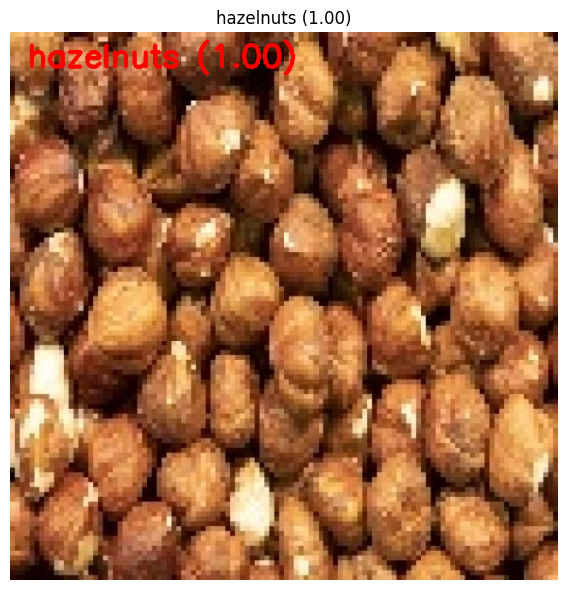

✅ Saved output image at: predicted_output.jpg


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

# ---------------------------------------------------------
# ✅ 1. LOAD TRAINED MODEL
# ---------------------------------------------------------
model_path = "runs/classify/nuts_classifier_yolo/weights/best.pt"
model = YOLO(model_path)

print("✅ Loaded model:", model_path)

# ---------------------------------------------------------
# ✅ 2. RUN PREDICTION
# ---------------------------------------------------------
image_path = r"C:\Users\Srividya\Documents\test.jpg"
results = model.predict(image_path, save=False)

# Extract prediction
result = results[0]
pred_class = result.names[result.probs.top1]
confidence = float(result.probs.top1conf)

print(f"\n✅ Predicted: {pred_class} ({confidence:.2f}) confidence\n")

# ---------------------------------------------------------
# ✅ 3. SHOW IMAGE WITH LABEL (JUPYTER FIX)
# ---------------------------------------------------------
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

label = f"{pred_class} ({confidence:.2f})"
cv2.putText(img, label, (20, 40),
            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 3)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(label)
plt.axis("off")
plt.tight_layout()
plt.show()        # ✅ Forces display in notebook

# ---------------------------------------------------------
# ✅ 4. SAVE OUTPUT IMAGE
# ---------------------------------------------------------
output_path = "predicted_output.jpg"
cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

print("✅ Saved output image at:", output_path)


In [6]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [7]:

!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension install --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Installing C:\Users\Srividya\Anaconda3\lib\site-packages\widgetsnbextension\static -> jupyter-js-widgets
Up to date: C:\ProgramData\jupyter\nbextensions\jupyter-js-widgets\extension.js
Up to date: C:\ProgramData\jupyter\nbextensions\jupyter-js-widgets\extension.js.map
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    


In [8]:
!pip install opencv-python ipywidgets ultralytics pillow
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [1]:
import cv2
import threading
import time
from IPython.display import display, clear_output
from ipywidgets import Button, HBox, VBox, Image as WImage, Output
from ultralytics import YOLO
from PIL import Image
import numpy as np
import io

# -------------------------
# Load YOLO Model
# -------------------------
# ✅ Replace with your nuts classification/detection model
model = YOLO("yolov8n.pt")

# Globals
webcam_running = False
frame_global = None

# Widgets
start_btn = Button(description="▶ Start Webcam", button_style='success')
capture_btn = Button(description="📸 Capture Image", button_style='warning')
stop_btn = Button(description="🛑 Stop Webcam", button_style='danger')

output_img = WImage(format='jpeg')
prediction_output = Output()


# -------------------------
# Webcam Loop
# -------------------------
def webcam_loop():
    global webcam_running, frame_global

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        with prediction_output:
            print("❌ ERROR: Cannot access webcam")
        return

    with prediction_output:
        print("✅ Webcam Started")

    while webcam_running:
        ret, frame = cap.read()
        if not ret:
            continue

        frame_global = frame.copy()

        # Convert to display image
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(rgb)
        buf = io.BytesIO()
        pil_img.save(buf, format='jpeg')
        output_img.value = buf.getvalue()

        time.sleep(0.03)

    cap.release()

    with prediction_output:
        print("✅ Webcam Stopped")


# -------------------------
# Capture Button: Prediction + Scores
# -------------------------
def capture_clicked(b):
    global frame_global

    prediction_output.clear_output()

    if frame_global is None:
        with prediction_output:
            print("❌ No frame captured yet")
        return

    with prediction_output:
        print("✅ Image Captured — Running Prediction...")

    rgb = cv2.cvtColor(frame_global, cv2.COLOR_BGR2RGB)

    # Run YOLO
    results = model(rgb)
    boxes = results[0].boxes  # All detected objects

    with prediction_output:
        if len(boxes) == 0:
            print("❌ No objects detected")
        else:
            print("✅ Predictions:")
            print("------------------------")

            for box in boxes:
                cls_id = int(box.cls[0])
                class_name = results[0].names[cls_id]
                conf = float(box.conf[0]) * 100

                print(f"🍀 Class: {class_name}")
                print(f"✅ Confidence: {conf:.2f}%")
                print("------------------------")

    # Plot prediction image
    pred_img = results[0].plot()
    pred_rgb = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
    pred_pil = Image.fromarray(pred_rgb)

    buf = io.BytesIO()
    pred_pil.save(buf, format='jpeg')
    output_img.value = buf.getvalue()


# -------------------------
# Button Callbacks
# -------------------------
def start_webcam_clicked(b):
    global webcam_running
    if not webcam_running:
        webcam_running = True
        threading.Thread(target=webcam_loop).start()

def stop_webcam_clicked(b):
    global webcam_running
    webcam_running = False


start_btn.on_click(start_webcam_clicked)
stop_btn.on_click(stop_webcam_clicked)
capture_btn.on_click(capture_clicked)

# -------------------------
# UI Layout
# -------------------------
display(VBox([
    HBox([start_btn, capture_btn, stop_btn]),
    output_img,
    prediction_output
]))


✅ Webcam Started
✅ Webcam Stopped


In [ ]:
import ipywidgets as widgets
widgets.Button(description="Test")


In [5]:
!pip install ultralytics opencv-python


In [1]:
import cv2

cap = cv2.VideoCapture(0)
if cap.isOpened():
    print("✅ Webcam detected")
else:
    print("❌ Webcam NOT detected. Try cap = cv2.VideoCapture(1)")
cap.release()


✅ Webcam detected


In [2]:
import zipfile
import os

zip_path = r"C:\Users\Srividya\Documents\nutty.zip"   # CHANGE THIS
extract_to = r"C:\Users\Srividya\Downloads\nutty"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Dataset extracted to:", extract_to)


✅ Dataset extracted to: C:\Users\Srividya\Downloads\nutty


In [3]:
yaml_content = """
path: nut_dataset
train: images/train
val: images/val

names:
  0: nut
"""

In [4]:
with open(r"C:\Users\Srividya\Downloads\nutty.yaml", "w") as f:
    f.write(yaml_content)

print(r"✅ C:\Users\Srividya\Downloads\nutty.yaml created")

✅ C:\Users\Srividya\Downloads\nutty.yaml created


In [5]:
import yaml
import os

# ✅ Set your dataset folder path
dataset_path = r"C:\Users\Srividya\Downloads\nutty"

# ✅ Set your class names here
class_names = [
    "almond",
    "cashew",
    "brazil nuts",
    "walnut",
    "pistachio",
    "macadamia",
    "pecans",
    "pinenuts",
    "peanut",
    "hazelnut"
]

# ✅ Prepare YAML content
data = {
    "train": os.path.join(dataset_path, "images/train").replace("\\", "/"),
    "val": os.path.join(dataset_path, "images/val").replace("\\", "/"),
    "names": {i: name for i, name in enumerate(class_names)}
}

# ✅ Save YAML file to: nutty.yaml inside dataset folder
yaml_path = os.path.join(dataset_path, "nutty.yaml")

with open(yaml_path, "w") as f:
    yaml.dump(data, f)

print("✅ nutty.yaml created at:", yaml_path)


✅ nutty.yaml created at: C:\Users\Srividya\Downloads\nutty\nutty.yaml


In [6]:
import yaml

yaml_path = r"C:\Users\Srividya\Downloads\nutty\nutty.yaml"

# ✅ Read YAML content
with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

print("✅ YAML Content:\n")
print(data)


✅ YAML Content:

{'names': {0: 'almond', 1: 'cashew', 2: 'brazil nuts', 3: 'walnut', 4: 'pistachio', 5: 'macadamia', 6: 'pecans', 7: 'pinenuts', 8: 'peanut', 9: 'hazelnut'}, 'train': 'C:/Users/Srividya/Downloads/nutty/images/train', 'val': 'C:/Users/Srividya/Downloads/nutty/images/val'}


In [7]:
import os

dataset_path = r"C:\Users\Srividya\Downloads\nutty"

for root, dirs, files in os.walk(dataset_path):
    print(root)
    for file in files:
        print("  -", file)


C:\Users\Srividya\Downloads\nutty
  - nutty.yaml
C:\Users\Srividya\Downloads\nutty\images
C:\Users\Srividya\Downloads\nutty\images\train
  - 001_jpg.rf.28e29aef757930a3f219b5e0ec44d0b0.jpg
  - 001_jpg.rf.2d340666178118ac299f24ea12764e98.jpg
  - 001_jpg.rf.66c7496a326b72e5c4aa36eb40bbcc6a.jpg
  - 001_jpg.rf.6bd0e6f1fae4f50a6c7cdeb2ce8c907b.jpg
  - 001_jpg.rf.880413604a5775bd44734d34862ba56a.jpg
  - 001_jpg.rf.e2347ed4a087f6960051af0b21714be5.jpg
  - 001_jpg.rf.e266146240b4dc7abb044b68a17c848f.jpg
  - 002_jpg.rf.4c597e9e1efcea2b641ca3888549da20.jpg
  - 002_jpg.rf.62c7509f6d653f20af602166d9713ae8.jpg
  - 002_jpg.rf.8af3ba13ce9916dcbf386218a5ea6ed0.jpg
  - 002_jpg.rf.97180442a737adc50e42f00cdcd0baab.jpg
  - 002_jpg.rf.cf57d53f9794f584077d08fb49ac76b5.jpg
  - 002_jpg.rf.e69c694e23f1b09e521f141986657d4f.jpg
  - 003_jpg.rf.68cedec5d26cfdb463ff4ff20a5d938e.jpg
  - 003_jpg.rf.6e4085a4455e739b599cdc6e864f6790.jpg
  - 003_jpg.rf.7e44c32b3dee810ad4ba0bfb770287f2.jpg
  - 003_jpg.rf.84bdabd7c0db7913

In [8]:
from ultralytics import YOLO

# Load base YOLO model
model = YOLO("yolov8s.pt")   # or yolov8n.pt

# ✅ Correct path — MUST point to the YAML file, not the folder
results = model.train(
    data=r"C:\Users\Srividya\Downloads\nutty\nutty.yaml",
    epochs=10,
    imgsz=640,
    batch=8
)

print("✅ Training Completed")


New https://pypi.org/project/ultralytics/8.3.225 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.222  Python-3.10.19 torch-2.9.0+cpu CPU (11th Gen Intel Core i7-11800H @ 2.30GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Srividya\Downloads\nutty\nutty.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train13,

C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\ultralytics\utils\metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/10         0G          0      25.56          0          0        640: 100% ━━━━━━━━━━━━ 66/66 0.2it/s 5:474.5ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 26/26 0.3it/s 1:404.0sss
                   all        407          0          0          0          0          0
WARNING no labels found in detect set, can not compute metrics without labels


C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\ultralytics\utils\metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/10         0G          0      11.77          0          0        640: 64% ━━━━━━━╸──── 42/66 0.2it/s 4:02<2:03



KeyboardInterrupt



In [1]:
import glob

# ✅ Find the latest best.pt inside runs/detect/
best_paths = glob.glob("runs/detect/train*/weights/best.pt")
best_paths.sort()

if len(best_paths) == 0:
    print("❌ best.pt not found")
else:
    best_pt = best_paths[-1]   # latest model
    print("✅ best.pt found at:", best_pt)


✅ best.pt found at: runs/detect\train\weights\best.pt


In [ ]:
import cv2
from ultralytics import YOLO
import tkinter as tk
from tkinter import *
from PIL import Image, ImageTk
import time

# ✅ Load your trained YOLO model
model = YOLO(r"runs/detect/train/weights/best.pt")  # change path if needed

# Global variables
cap = None
running = False


# ✅ Start webcam
def start_webcam():
    global cap, running
    if not running:
        cap = cv2.VideoCapture(0)
        running = True
        show_frame()


# ✅ Stop webcam
def stop_webcam():
    global running, cap
    running = False
    if cap:
        cap.release()
    lbl.config(image='')


# ✅ Capture image
def capture_image():
    global cap
    if cap and running:
        ret, frame = cap.read()
        if ret:
            filename = f"capture_{int(time.time())}.jpg"
            cv2.imwrite(filename, frame)
            print("✅ Image saved:", filename)


# ✅ Process & show webcam frames
def show_frame():
    global cap, running

    if running:
        ret, frame = cap.read()
        if ret:

            # ✅ YOLO Prediction
            results = model.predict(frame, imgsz=640, conf=0.5)

            # ✅ Draw detection results
            for box in results[0].boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cls = int(box.cls[0])
                name = model.names[cls]
                conf = float(box.conf[0])

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(
                    frame,
                    f"{name} {conf:.2f}",
                    (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.7,
                    (0, 255, 0),
                    2
                )

            # ✅ Convert OpenCV → Tkinter frame
            imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            im = Image.fromarray(imgRGB)
            img_tk = ImageTk.PhotoImage(image=im)

            lbl.img_tk = img_tk
            lbl.config(image=img_tk)

        # ✅ Refresh every 10ms
        lbl.after(10, show_frame)


# ✅ Tkinter GUI Window
root = tk.Tk()
root.title("Nut Detector - YOLO Live")

# ✅ Live display label
lbl = Label(root)
lbl.pack()

# ✅ Buttons
Button(root, text="Start Webcam", command=start_webcam,
       width=20, height=2, bg="green", fg="white").pack(pady=5)

Button(root, text="Capture Image", command=capture_image,
       width=20, height=2, bg="blue", fg="white").pack(pady=5)

Button(root, text="Stop Webcam", command=stop_webcam,
       width=20, height=2, bg="red", fg="white").pack(pady=5)

root.mainloop()


In [ ]:
from ultralytics import YOLO
import cv2

# ✅ Set your exact best.pt path (replace this)
model_path = r"runs/detect/train/weights/best.pt"

# ✅ Load model safely
model = YOLO(model_path)

# ✅ Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Cannot open webcam")
    exit()

print("✅ Webcam opened. Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # ✅ Predict
    results = model.predict(frame, imgsz=640, conf=0.5)

    # ✅ Annotated frame
    annotated = results[0].plot()

    # ✅ Print detected nut names
    for box in results[0].boxes:
        cls = int(box.cls[0])
        print("Detected:", model.names[cls])

    # ✅ Show video
    cv2.imshow("Nut Detection", annotated)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


✅ Webcam opened. Press 'q' to quit.

0: 480x640 (no detections), 72.2ms
Speed: 58.6ms preprocess, 72.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 47.0ms
Speed: 2.0ms preprocess, 47.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 48.6ms
Speed: 1.6ms preprocess, 48.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 51.0ms
Speed: 1.3ms preprocess, 51.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 48.2ms
Speed: 1.3ms preprocess, 48.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 50.4ms
Speed: 1.7ms preprocess, 50.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 42.6ms
Speed: 1.6ms preprocess, 42.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 52.

In [ ]:
from ultralytics import YOLO
import cv2

# ✅ Load your trained model
model = YOLO("runs/detect/train*/weights/best.pt")   # or replace with exact path

# ✅ Open the webcam (0 = default webcam)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Cannot open webcam")
    exit()

print("✅ Webcam opened. Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame")
        break

    # ✅ Predict on the frame
    results = model.predict(frame, imgsz=640, conf=0.5)

    # ✅ Draw predictions on frame
    annotated = results[0].plot()

    # ✅ Extract detected nut names (class labels)
    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        nut_name = model.names[cls_id]
        print("Detected:", nut_name)

    # ✅ Show the frame
    cv2.imshow("Nut Detection", annotated)

    # ✅ Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [2]:
from ultralytics import YOLO
import glob

# ✅ Find latest best.pt
best_paths = glob.glob("runs/detect/train*/weights/best.pt")
best_paths.sort()
best_pt = best_paths[-1]

print("✅ Using model:", best_pt)

# ✅ Load model
model = YOLO(best_pt)

# ✅ Run prediction on your dataset
result = model.predict(
    source=r"C:\Users\Srividya\Downloads\nutty\images\val",
    save=True,
    show=True
)


✅ Using model: runs/detect\train\weights\best.pt

image 1/407 C:\Users\Srividya\Downloads\nutty\images\val\066_jpg.rf.a486ee5ca42f476d22ef0ffd33a51632.jpg: 640x640 (no detections), 146.1ms
image 2/407 C:\Users\Srividya\Downloads\nutty\images\val\066_jpg.rf.a7cf44ba4c899476959825f903f3dedf.jpg: 640x640 (no detections), 62.7ms
image 3/407 C:\Users\Srividya\Downloads\nutty\images\val\067_jpg.rf.48fe90061af2572eb82eaa249345d4cc.jpg: 640x640 (no detections), 56.0ms
image 4/407 C:\Users\Srividya\Downloads\nutty\images\val\067_jpg.rf.8de399a4d8d4c691acce368a562c0c50.jpg: 640x640 (no detections), 51.4ms
image 5/407 C:\Users\Srividya\Downloads\nutty\images\val\067_jpg.rf.d9bcd2b0daedd905b1245b1e855fc5b0.jpg: 640x640 (no detections), 51.4ms
image 6/407 C:\Users\Srividya\Downloads\nutty\images\val\067_jpg.rf.dacecf55ccab9be0078762f8cec1464f.jpg: 640x640 (no detections), 54.1ms
image 7/407 C:\Users\Srividya\Downloads\nutty\images\val\067_jpg.rf.e8d94bae86b8279154136e5835ba16df.jpg: 640x640 (no det

KeyboardInterrupt: 